In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [57]:
def find_loss(theta, input, expected) -> float:
    m = len(input)
    predicted = input.dot(theta)
    difference = (predicted - expected)**2
    J = 1 / (2 * m) * np.sum(difference)
    return J

In [58]:
def validate(test_x, test_y, thetas) -> float:
    loss = 0
    for input, expected in zip(test_x, test_y):
        loss += find_loss(thetas, input, expected)
    return loss

In [59]:
df = pd.read_csv("Housing.csv")

df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 2 if x == 'furnished' else 0)

temp_y = df.pop('price')
columns_to_separate = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
bool_df = {col: df.pop(col) for col in columns_to_separate}

# Normailzation
norm = np.linalg.norm(df)
df = df/norm

# Standardization
# standard = (df - np.mean(df)) / np.std(df)

df['price'] = temp_y
for col in columns_to_separate:
    df[col] = bool_df[col]
train_df, test_df = train_test_split(df, test_size=0.2, random_state=15)

y = np.array(train_df.pop('price'))

test_y = np.array(test_df.pop('price'))

m = len(y)
test_m = len(test_y)

In [60]:
# Part A
# factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# iterations = 500
# alpha = 0.01

# Part B
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea']
iterations = 250
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

X_b_train = np.c_[np.ones((len(train_df), 1)), train_df]
X_b_val = np.c_[np.ones((len(test_df), 1)), test_df]

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

In [65]:
theta = np.zeros(len(factors_list)+1)

j : list = []
validation_loss : list[float] = []
total_thetas : list = []
train_losses : list = []
    
for i in range(iterations):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * x.transpose().dot(errors)
    theta -= sum_delta
    loss = find_loss(theta, x, y)
    j.append(loss)
    v = validate(test_x, test_y, theta)
    validation_loss.append(v)

    # gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y)
    # theta -= alpha * gradients

    # train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y))
    # val_loss = (1/len(X_b_val)) * np.sum(np.square(X_b_val.dot(theta) - test_y))

    # train_losses.append(train_loss)
    # validation_loss.append(val_loss)

total_thetas.append(theta)
# total_loss.append(j[-1])


Thetas: [array([2.27678013e+06, 1.18766539e+05, 6.01559766e+01, 2.94126045e+01,
       4.19675990e+01, 1.86240048e+06, 3.81221461e+05, 6.74660480e+05,
       2.14907421e+05, 1.14829088e+06, 1.98200731e+01, 6.98549281e+05])]
Losses: [1145289381616.8926]
Validation Loss: 12619054776173.666


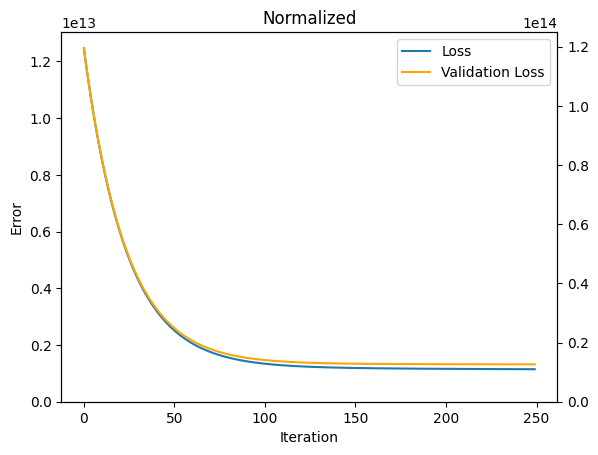

In [ ]:
print("Thetas:", total_thetas)
# print("Losses:", total_loss)
print("Validation Loss:", validation_loss[-1])

fig, ax = plt.subplots()

ax.plot(j, label='Loss')
ax2 = ax.twinx()
ax2.plot(validation_loss, label='Validation Loss', color='orange')
ax.legend()
ax.set_ylabel('Error')
ax.set_xlabel('Iteration')
ax.set_ylim(0, ax.get_ylim()[1])
ax2.set_ylim(0, ax2.get_ylim()[1])

# Combine legends for both lines
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
ax.set_title('Normalized')
plt.show()